In [4]:
import matplotlib.pyplot as plt
import pandas as pd

wide_df = pd.read_csv('data/wide_data.csv', parse_dates=['date'])
long_df = pd.read_csv('data/long_data.csv',
                     usecols=['datatype', 'date', 'value'],
                     parse_dates=['date'])[['date','datatype','value']] #Sorting the columns

In [5]:
wide_df.head()

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1
3,2018-10-04,22.8,11.7,11.7
4,2018-10-05,23.3,11.7,18.9


In [8]:
wide_df.describe(include='all')

,date,TMAX,TMIN,TOBS
count,31,31.000000,31.000000,31.000000
unique,31,NaN,NaN,NaN
top,2018-10-01 00:00:00,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
first,2018-10-01 00:00:00,NaN,NaN,NaN
last,2018-10-31 00:00:00,NaN,NaN,NaN
mean,NaN,16.829032,7.561290,10.022581
std,NaN,5.714962,6.513252,6.596550
min,NaN,7.800000,-1.100000,-1.100000
25%,NaN,12.750000,2.500000,5.550000


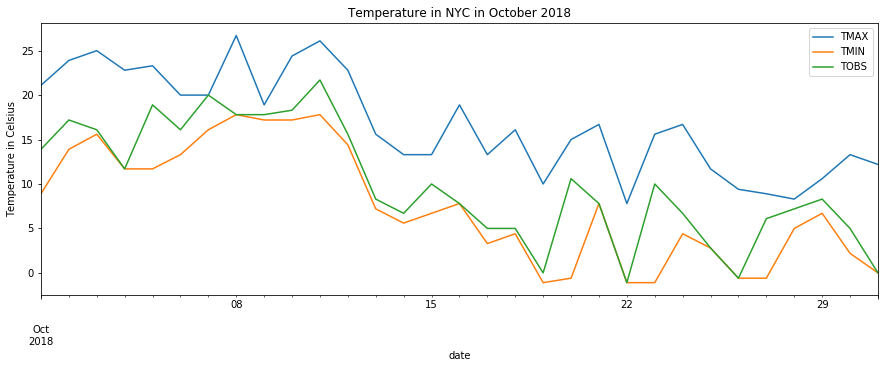

In [9]:
# Plot using Pandas
wide_df.plot(
    kind='line', y=['TMAX', 'TMIN', 'TOBS'], x='date',
    title='Temperature in NYC in October 2018',
    figsize=(15,5)).set_ylabel('Temperature in Celsius')
plt.show()

In [10]:
# Checking Long Data
long_df.head()

,date,datatype,value
0,2018-10-01,TMAX,21.1
1,2018-10-01,TMIN,8.9
2,2018-10-01,TOBS,13.9
3,2018-10-02,TMAX,23.9
4,2018-10-02,TMIN,13.9


In [11]:
long_df.describe(include='all')

,date,datatype,value
count,93,93,93.000000
unique,31,3,NaN
top,2018-10-01 00:00:00,TMAX,NaN
freq,3,31,NaN
first,2018-10-01 00:00:00,NaN,NaN
last,2018-10-31 00:00:00,NaN,NaN
mean,NaN,NaN,11.470968
std,NaN,NaN,7.362354
min,NaN,NaN,-1.100000
25%,NaN,NaN,6.700000


In [ ]:
import seaborn as sns # more on module 8

sns.set(rc={'figure.figsize':(15,5)}, style='white')

ax = sns.lineplot(data=long_df, hue='datatype', y = 'value', x ='date')
ax.set_ylabel('Temperature in Celsius')
ax.set_title('Temperature in NYC in October 2018')
plt.show()

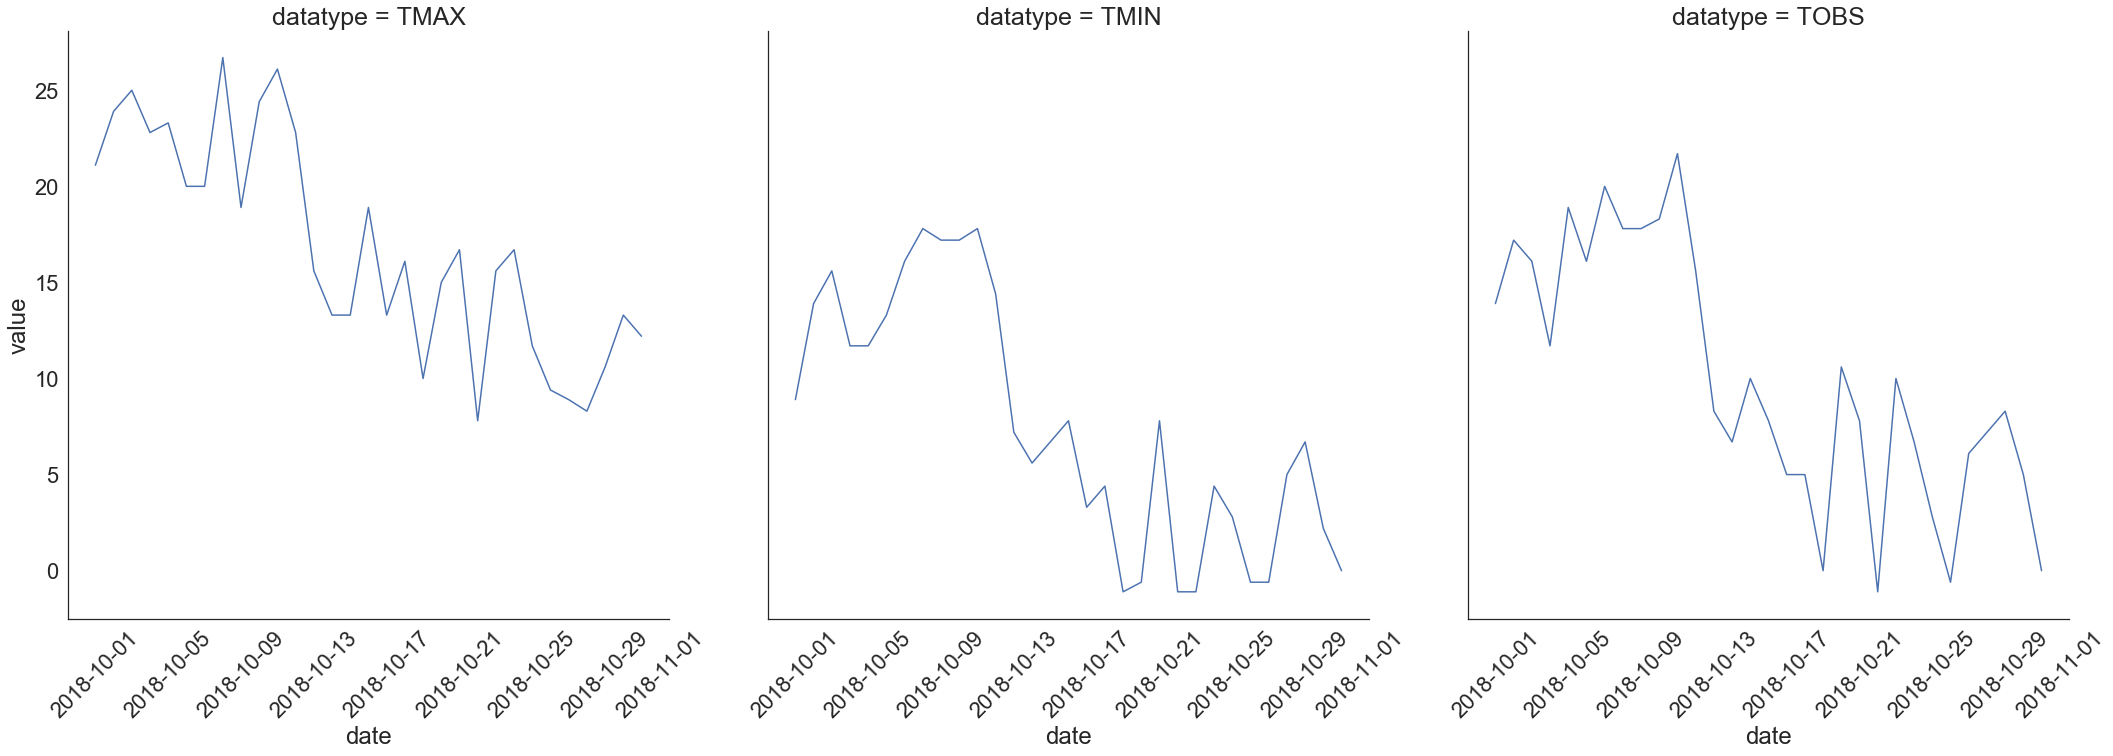

In [13]:
sns.set(rc={'figure.figsize':(20,10)}, style='white', font_scale=2)

g = sns.FacetGrid(long_df, col='datatype', height=10)
g = g.map(plt.plot, "date", "value")
g.set_titles(size=25)
g.set_xticklabels(rotation=45)
plt.show()

# Collecting Data from API

In [14]:
# Token = HsNMMbLymzbRjUORHZhOnKxHLqsIIpkD
# URL = https://www.ncei.noaa.gov/cdo-web/api/v2/{endpoint}

import requests

def make_request(endpoint, payload=None):
    """
    Request from an API.
    
    Parameters:
        - endpoint -> endpoint of the API request.
                    The data you want to GET.
        - payload -> a dictionary of data to pass along
                    to the request.
                    
    Returns: a response object.
    """
    return requests.get(
        f'https://www.ncei.noaa.gov/cdo-web/api/v2/{endpoint}',
        headers={
            'token': 'HsNMMbLymzbRjUORHZhOnKxHLqsIIpkD'
        },
        params=payload
    )

In [16]:
response = make_request('datasets', {'startdate':'2023-03-14'})
response.status_code

200

In [17]:
response.json().keys()

dict_keys(['metadata', 'results'])

In [18]:
response.json()['metadata']

{'resultset': {'offset': 1, 'count': 11, 'limit': 25}}

In [19]:
response.json()['results'][0].keys()

dict_keys(['uid', 'mindate', 'maxdate', 'name', 'datacoverage', 'id'])

In [20]:
[(data['id'], data['name']) for data in response.json()['results']]

[('GHCND', 'Daily Summaries'),
 ('GSOM', 'Global Summary of the Month'),
 ('GSOY', 'Global Summary of the Year'),
 ('NEXRAD2', 'Weather Radar (Level II)'),
 ('NEXRAD3', 'Weather Radar (Level III)'),
 ('NORMAL_ANN', 'Normals Annual/Seasonal'),
 ('NORMAL_DLY', 'Normals Daily'),
 ('NORMAL_HLY', 'Normals Hourly'),
 ('NORMAL_MLY', 'Normals Monthly'),
 ('PRECIP_15', 'Precipitation 15 Minute'),
 ('PRECIP_HLY', 'Precipitation Hourly')]

In [21]:
response = make_request(
    'datacategories',
    payload={
        'datasetid':'GHCND'
    }
)
response.status_code

200

In [22]:
response.json()['results']

[{'name': 'Evaporation', 'id': 'EVAP'},
 {'name': 'Land', 'id': 'LAND'},
 {'name': 'Precipitation', 'id': 'PRCP'},
 {'name': 'Sky cover & clouds', 'id': 'SKY'},
 {'name': 'Sunshine', 'id': 'SUN'},
 {'name': 'Air Temperature', 'id': 'TEMP'},
 {'name': 'Water', 'id': 'WATER'},
 {'name': 'Wind', 'id': 'WIND'},
 {'name': 'Weather Type', 'id': 'WXTYPE'}]

In [23]:
response = make_request(
    'datatypes',
    payload={
        'datacategoryid':'TEMP',
        'limit':100
    }
)
response.status_code

200

In [28]:
[(datatype['id'], datatype['name']) for datatype in response.json()['results']][-5:]

[('MNTM', 'Monthly mean temperature'),
 ('TAVG', 'Average Temperature.'),
 ('TMAX', 'Maximum temperature'),
 ('TMIN', 'Minimum temperature'),
 ('TOBS', 'Temperature at the time of observation')]

In [29]:
response = make_request(
    'locationcategories',
    payload={
        'datasetid':'GHCND'
    }
)
response.status_code

200

In [30]:
import pprint
pprint.pprint(response.json())

{'metadata': {'resultset': {'count': 12, 'limit': 25, 'offset': 1}},
 'results': [{'id': 'CITY', 'name': 'City'},
             {'id': 'CLIM_DIV', 'name': 'Climate Division'},
             {'id': 'CLIM_REG', 'name': 'Climate Region'},
             {'id': 'CNTRY', 'name': 'Country'},
             {'id': 'CNTY', 'name': 'County'},
             {'id': 'HYD_ACC', 'name': 'Hydrologic Accounting Unit'},
             {'id': 'HYD_CAT', 'name': 'Hydrologic Cataloging Unit'},
             {'id': 'HYD_REG', 'name': 'Hydrologic Region'},
             {'id': 'HYD_SUB', 'name': 'Hydrologic Subregion'},
             {'id': 'ST', 'name': 'State'},
             {'id': 'US_TERR', 'name': 'US Territory'},
             {'id': 'ZIP', 'name': 'Zip Code'}]}


In [37]:
def get_item(name, what, endpoint, start=1, end=None):
    """
    Get the json payload for a given field using binary search.
    
    Parameters:
        - name : data item
        - what : specification in the dictionary
        - endpoint : where to look.
        - start : beginning of the set.
        - end : the last position.
        
    Returns:
        - Dictionary
    
    """
    
    # Find the midpoint of the dataset
    mid = (start + (end if end else 1)) // 2
    
    # change name input to lowercase
    name = name.lower()
    
    payload = {
        'datasetid':'GHCND',
        'sortfield':'name',
        'offset': mid,
        'limit' : 1
    }
    
    response = make_request(endpoint, {**payload, **what})
    
    if response.ok:
        # Get the end value
        end = end if end else response.json()['metadata']['resultset']['count']
        
        # Get the lowercase of the current element name
        current_name = response.json()['results'][0]['name'].lower()
        
        if name in current_name:
            return response.json()['results'][0]
        else:
            if start >= end:
                return {}
            elif name < current_name:
                return get_item(name, what, endpoint, start, mid - 1)
            elif name > current_name:
                return get_item(name, what, endpoint, mid+1, end)
    else:
        print(f'Response not ok, status {response.status_code}')
        
def get_location(name):
    return get_item(name, {'locationcategoryid':'CITY'}, 'locations')

In [38]:
nyc = get_location('New York')
nyc

{'mindate': '1869-01-01',
 'maxdate': '2023-03-12',
 'name': 'New York, NY US',
 'datacoverage': 1,
 'id': 'CITY:US360019'}